In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


# Text processing libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"\nAnalysis started on: {pd.Timestamp.now()}")

Libraries imported successfully!

Analysis started on: 2025-11-05 15:21:47.544573


In [3]:
# Load the dataset
print("Loading USvideos.csv dataset...")
df = pd.read_csv('USvideos.csv', encoding='utf-8', on_bad_lines='skip')

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic information
print("\n Dataset Info ")
df.info()

Loading USvideos.csv dataset...
Dataset loaded successfully!
Dataset shape: (40949, 16)
Columns: ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']

 Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes      

In [4]:
# Display first ten rows
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [5]:
# Dataset statistics and exploration
print(" Dataset Statistics ")
print(f"Total videos: {len(df):,}")
print(f"Date range: {df['trending_date'].min()} to {df['trending_date'].max()}")
print(f"Unique categories: {df['category_id'].nunique()}")
print(f"Unique channels: {df['channel_title'].nunique()}")

print("\n Missing Values ")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n Video Categories Distribution ")
if 'category_id' in df.columns:
    print(df['category_id'].value_counts().head(10))

print("\n Sample Video Titles ")
if 'title' in df.columns:
    print(df['title'].head(10).tolist())

 Dataset Statistics 
Total videos: 40,949
Date range: 17.01.12 to 18.31.05
Unique categories: 16
Unique channels: 2207

 Missing Values 
description    570
dtype: int64

 Video Categories Distribution 
category_id
24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
Name: count, dtype: int64

 Sample Video Titles 
['WE WANT TO TALK ABOUT OUR MARRIAGE', 'The Trump Presidency: Last Week Tonight with John Oliver (HBO)', 'Racist Superman | Rudy Mancuso, King Bach & Lele Pons', 'Nickelback Lyrics: Real or Fake?', 'I Dare You: GOING BALD!?', '2 Weeks with iPhone X', 'Roy Moore & Jeff Sessions Cold Open - SNL', '5 Ice Cream Gadgets put to the Test', 'The Greatest Showman | Official Trailer 2 [HD] | 20th Century FOX', 'Why the rise of the robots won’t mean the end of work']


In [6]:
# Text cleaning functions
def remove_emojis(text):
    """Remove emojis from text"""
    if not isinstance(text, str):
        return ""
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002702-\U000027B0"  # dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    """Comprehensive text cleaning"""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove emojis
    text = remove_emojis(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    
    # Remove punctuation but keep apostrophes
    text = re.sub(r"[^\w\s']", ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text

print("Text cleaning functions defined successfully!")

Text cleaning functions defined successfully!


In [7]:
# Apply text cleaning to relevant columns
text_columns = ['title', 'description', 'tags']
available_text_columns = [col for col in text_columns if col in df.columns]

print(f"Available text columns for cleaning: {available_text_columns}")

# Clean text data
for col in available_text_columns:
    print(f"Cleaning {col}...")
    df[f'{col}_clean'] = df[col].fillna('').apply(clean_text)
    print(f"✓ {col} cleaned")

# Create a combined text field for analysis
df['combined_text'] = ''
for col in available_text_columns:
    df['combined_text'] += ' ' + df[f'{col}_clean'].fillna('')

df['combined_text'] = df['combined_text'].str.strip()

print("\n Text Cleaning Complete ")
print(f"Sample cleaned text:")
if len(df) > 0:
    print(df['combined_text'].iloc[0][:200] + "...")

Available text columns for cleaning: ['title', 'description', 'tags']
Cleaning title...
✓ title cleaned
Cleaning description...
✓ description cleaned
Cleaning tags...
✓ tags cleaned

 Text Cleaning Complete 
Sample cleaned text:
we want to talk about our marriage shantell's channel this video in 4k on this this lens drone gear camera camera lens sony camera canon camera tripod thing need this for the bendy tripod lens expensi...


In [8]:
# Remove stopwords
try:
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords', quiet=True)
    stop_words = set(stopwords.words('english'))
except:
    # Fallback stopwords list
    stop_words = {'the', 'and', 'is', 'in', 'to', 'of', 'a', 'for', 'it', 'that', 'on', 'this', 'with', 'as', 'are', 'was', 'be', 'by', 'an', 'at', 'or', 'but', 'not', 'have', 'from', 'they', 'we', 'you', 'all', 'can', 'had', 'her', 'him', 'his', 'how', 'if', 'its', 'our', 'out', 'so', 'their', 'them', 'these', 'will', 'your'}

def remove_stopwords(text):
    """Remove stopwords from text"""
    if not isinstance(text, str) or not text.strip():
        return ''
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 2]
    return ' '.join(filtered_words)

# Apply stopword removal
df['text_no_stopwords'] = df['combined_text'].apply(remove_stopwords)

print("Stopwords removed successfully!")
print(f"Sample text without stopwords:")
if len(df) > 0:
    print(df['text_no_stopwords'].iloc[0][:200] + "...")

Stopwords removed successfully!
Sample text without stopwords:
want talk marriage shantell's channel video lens drone gear camera camera lens sony camera canon camera tripod thing need bendy tripod lens expensive wide lens camera microphone drone cheaper still gr...


Extracting top keywords using word counts...

Top 20 Most Frequent Terms:
          term  count
938      video  31960
590        new  22761
567      music  21455
940     videos  17039
783       show  15642
3         2018  14655
595       news  14486
996    youtube  14040
130    channel  13763
633   official  12927
327        get  12696
917    twitter  12350
516     makeup  11812
407  instagram  11438
262   facebook  11178
494       live  11108
513       make  10735
986      world  10493
846  subscribe  10469
483       like  10372


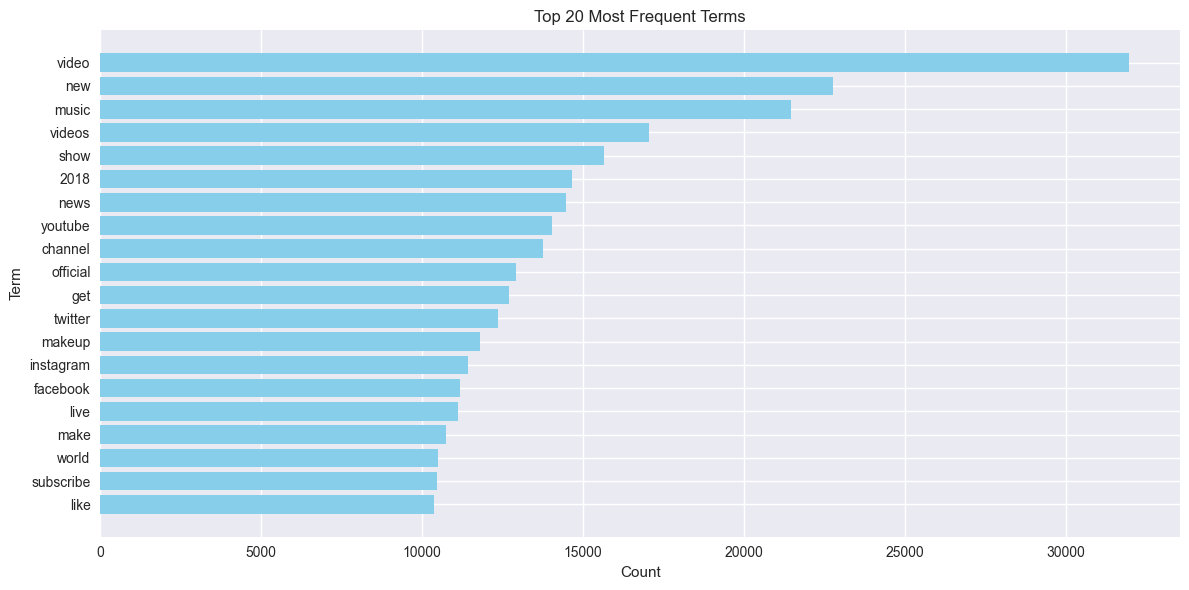

In [9]:
# Extract top keywords using word counts and visualize
print("Extracting top keywords using word counts...")

# Add this line to define valid_texts before it is used
valid_texts = df['text_no_stopwords'].dropna().tolist()

if len(valid_texts) > 0:
    from sklearn.feature_extraction.text import CountVectorizer
    
    # Count Vectorization
    count_vectorizer = CountVectorizer(
        max_df=0.95,
        min_df=5,
        ngram_range=(1, 2),
        max_features=1000
    )
    
    count_matrix = count_vectorizer.fit_transform(valid_texts)
    feature_names_count = count_vectorizer.get_feature_names_out()
    
    # Calculate word counts
    word_counts = np.sum(count_matrix.toarray(), axis=0)
    
    # Create count results dataframe
    count_results = pd.DataFrame({
        'term': feature_names_count,
        'count': word_counts
    }).sort_values('count', ascending=False)
    
    # Display top 20 terms
    print("\nTop 20 Most Frequent Terms:")
    print(count_results.head(20))
    
    # Plot top 20 terms
    top_terms = count_results.head(20)
    plt.figure(figsize=(12,6))
    plt.barh(top_terms['term'][::-1], top_terms['count'][::-1], color='skyblue')  # reverse for descending order
    plt.xlabel('Count')
    plt.ylabel('Term')
    plt.title('Top 20 Most Frequent Terms')
    plt.tight_layout()
    plt.show()
    
else:
    print("No valid text data found for count analysis")

In [10]:
# Create additional features
print("Creating additional features...")

# Text length features
df['title_length'] = df['title'].fillna('').str.len()
df['description_length'] = df['description'].fillna('').str.len()

# Engagement features
if 'views' in df.columns and 'likes' in df.columns:
    df['like_rate'] = df['likes'] / (df['views'] + 1)
    df['engagement_score'] = (df['likes'] + df['dislikes'] + df['comment_count']) / (df['views'] + 1)

# Category mapping (common YouTube categories)
category_mapping = {
    1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music',
    15: 'Pets & Animals', 17: 'Sports', 19: 'Travel & Events',
    20: 'Gaming', 22: 'People & Blogs', 23: 'Comedy',
    24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style',
    27: 'Education', 28: 'Science & Technology'
}

if 'category_id' in df.columns:
    df['category_name'] = df['category_id'].map(category_mapping).fillna('Other')

# Initialize cat_sentiment variable early to prevent errors later
cat_sentiment = pd.DataFrame()
print("Additional features created successfully!")

Creating additional features...
Additional features created successfully!


Performing sentiment analysis using TextBlob...
Analyzing sentiment for combined text...
Analyzing sentiment for video titles...

=== Sentiment Analysis Complete ===
Sentiment Distribution:
sentiment_label
Positive    26205
Neutral     12556
Negative     2188
Name: count, dtype: int64

Title Sentiment Distribution:
title_sentiment
Neutral     26095
Positive    10060
Negative     4794
Name: count, dtype: int64


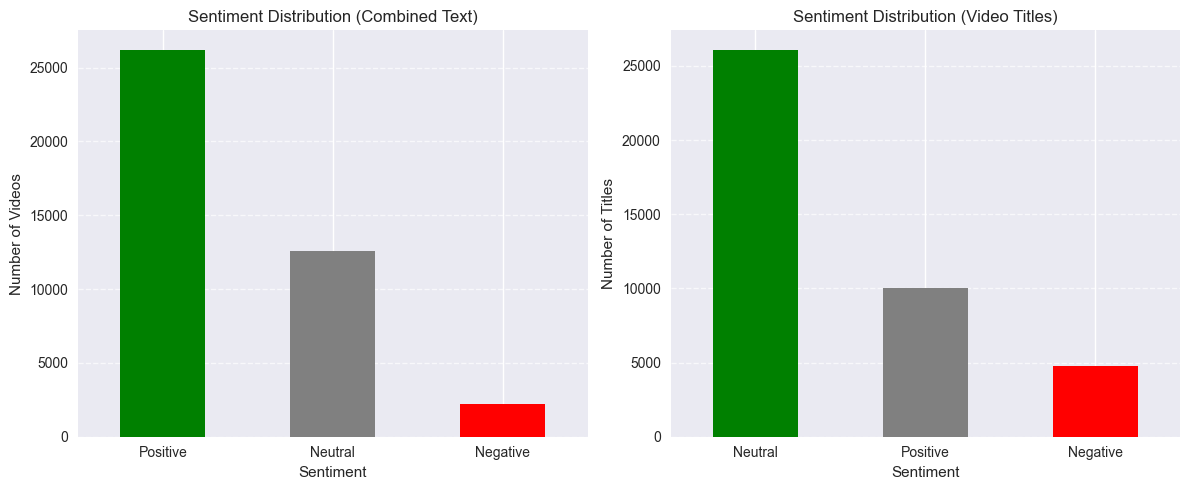

In [11]:
from textblob import TextBlob
import matplotlib.pyplot as plt

print("Performing sentiment analysis using TextBlob...")

# --- Functions ---
def get_sentiment_textblob(text):
    """Calculate sentiment using TextBlob"""
    if not isinstance(text, str) or not text.strip():
        return 0.0, 0.0
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except:
        return 0.0, 0.0

def classify_sentiment(polarity):
    """Classify sentiment based on polarity score"""
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# --- Combined text sentiment ---
print("Analyzing sentiment for combined text...")
sentiment_results = df['combined_text'].apply(get_sentiment_textblob)
df['polarity'] = [r[0] for r in sentiment_results]
df['subjectivity'] = [r[1] for r in sentiment_results]
df['sentiment_label'] = df['polarity'].apply(classify_sentiment)

# --- Title sentiment ---
print("Analyzing sentiment for video titles...")
title_sentiment_results = df['title'].fillna('').apply(get_sentiment_textblob)
df['title_polarity'] = [r[0] for r in title_sentiment_results]
df['title_sentiment'] = df['title_polarity'].apply(classify_sentiment)

# --- Print results ---
print("\n=== Sentiment Analysis Complete ===")
print("Sentiment Distribution:")
print(df['sentiment_label'].value_counts())
print("\nTitle Sentiment Distribution:")
print(df['title_sentiment'].value_counts())

# --- Bar plots ---
plt.figure(figsize=(12, 5))

# Combined Text Sentiment
plt.subplot(1, 2, 1)
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution (Combined Text)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Title Sentiment
plt.subplot(1, 2, 2)
df['title_sentiment'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution (Video Titles)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



 Sentiment by Category 
sentiment_label       Negative  Neutral  Positive  Total
category_name                                           
Entertainment              446     3034      6484   9964
Music                      340     2259      3873   6472
Howto & Style              129     1010      3007   4146
Comedy                     324     1058      2075   3457
People & Blogs             180      963      2067   3210
News & Politics            171      749      1567   2487
Science & Technology       165      885      1351   2401
Film & Animation            93      709      1543   2345
Sports                     115      585      1474   2174
Education                   79      594       983   1656
Pets & Animals               7      251       662    920
Gaming                      61      247       509    817
Travel & Events             21       51       330    402
Autos & Vehicles            28      106       250    384
Other                       29       55        30    114


<Figure size 1200x600 with 0 Axes>

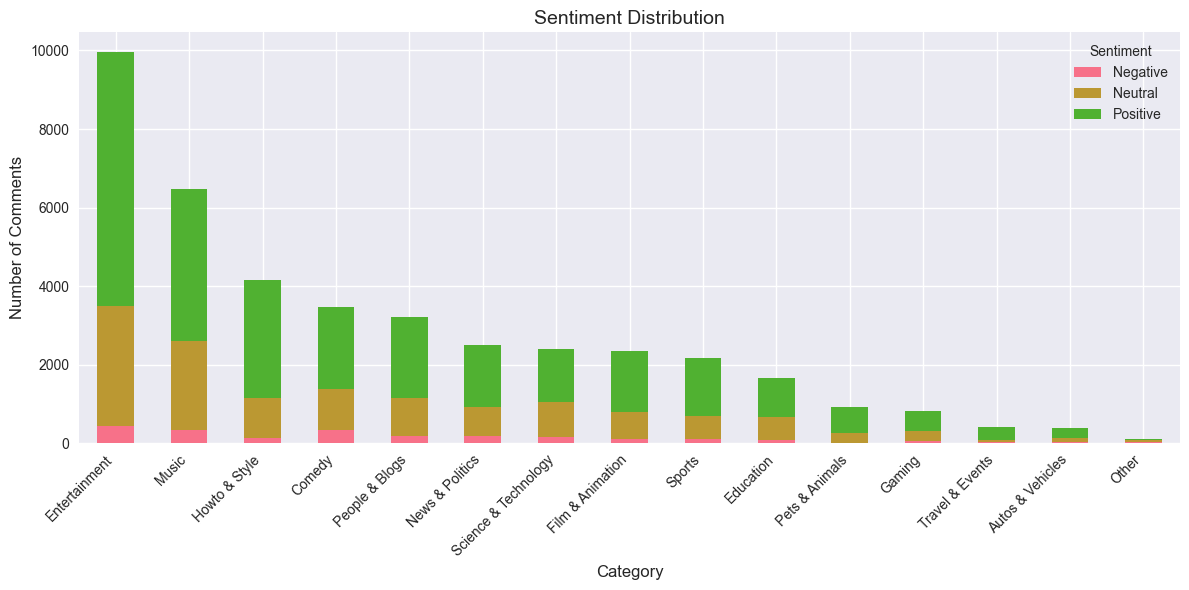

In [12]:
#sentiment statistics 

# Plot Sentiment by Category
if 'category_name' in df.columns:
    print("\n Sentiment by Category ")
    category_sentiment = df.groupby(['category_name', 'sentiment_label']).size().unstack(fill_value=0)
    category_sentiment['Total'] = category_sentiment.sum(axis=1)
    category_sentiment = category_sentiment.sort_values('Total', ascending=False)
    print(category_sentiment)

    #  Plotting 
    plt.figure(figsize=(12, 6))
    category_sentiment.drop(columns='Total').plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6)
    )

    plt.title("Sentiment Distribution", fontsize=14)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Number of Comments", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()
else:
    print("No 'category_name' column found for plotting sentiment by category.")


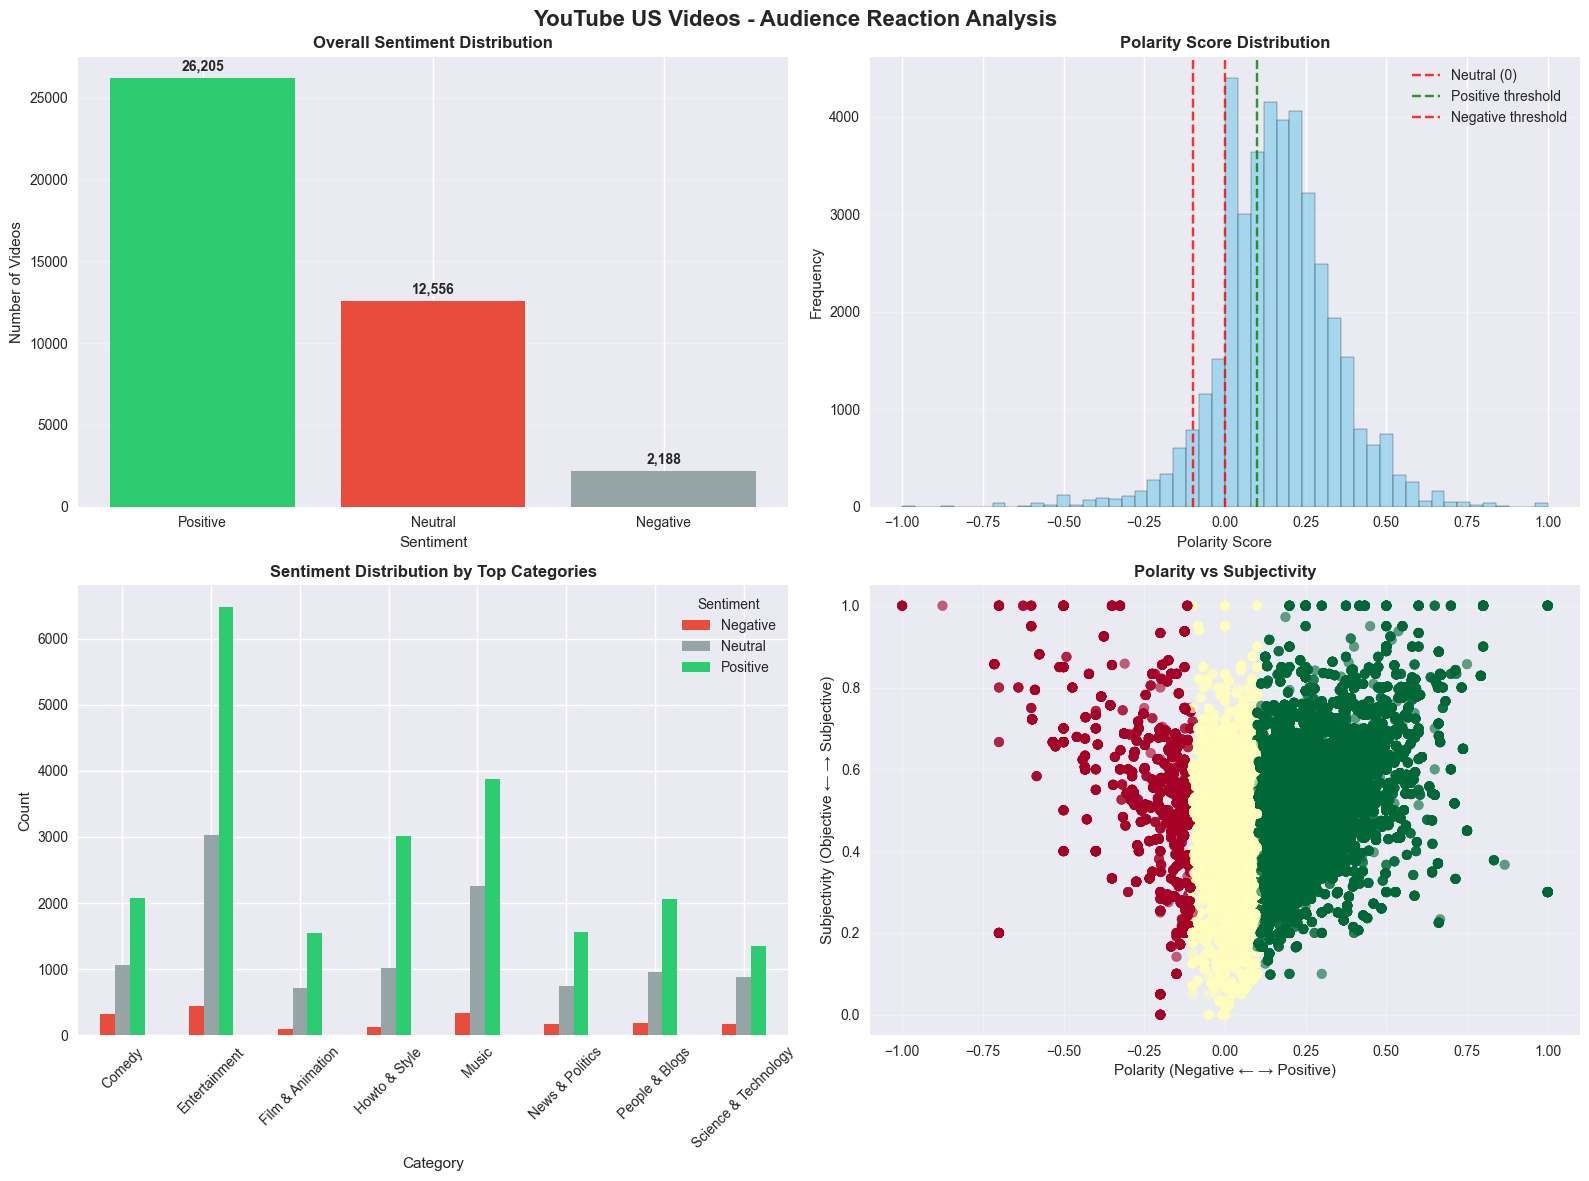

Sentiment analysis visualizations created!


In [13]:
# Create comprehensive sentiment visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('YouTube US Videos - Audience Reaction Analysis', fontsize=16, fontweight='bold')

# 1. Sentiment Distribution
sentiment_counts = df['sentiment_label'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # Green, Red, Gray
bars = ax1.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
ax1.set_title('Overall Sentiment Distribution', fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of Videos')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(sentiment_counts) * 0.01,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# 2. Polarity Distribution
ax2.hist(df['polarity'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Neutral (0)')
ax2.axvline(x=0.1, color='green', linestyle='--', alpha=0.8, label='Positive threshold')
ax2.axvline(x=-0.1, color='red', linestyle='--', alpha=0.8, label='Negative threshold')
ax2.set_title('Polarity Score Distribution', fontweight='bold')
ax2.set_xlabel('Polarity Score')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Sentiment by Category (if available)
if 'category_name' in df.columns:
    top_categories = df['category_name'].value_counts().head(8).index
    category_sentiment_plot = df[df['category_name'].isin(top_categories)]
    
    sentiment_by_cat = category_sentiment_plot.groupby(['category_name', 'sentiment_label']).size().unstack(fill_value=0)
    sentiment_by_cat.plot(kind='bar', ax=ax3, color=['#e74c3c', '#95a5a6', '#2ecc71'])
    ax3.set_title('Sentiment Distribution by Top Categories', fontweight='bold')
    ax3.set_xlabel('Category')
    ax3.set_ylabel('Count')
    ax3.legend(title='Sentiment')
    ax3.tick_params(axis='x', rotation=45)
else:
    ax3.text(0.5, 0.5, 'Category data not available', ha='center', va='center', transform=ax3.transAxes)

# 4. Polarity vs Subjectivity scatter
scatter = ax4.scatter(df['polarity'], df['subjectivity'], 
                    c=df['sentiment_label'].map({'Positive': 0, 'Neutral': 1, 'Negative': 2}),
                    cmap='RdYlGn_r', alpha=0.6)
ax4.set_title('Polarity vs Subjectivity', fontweight='bold')
ax4.set_xlabel('Polarity (Negative ← → Positive)')
ax4.set_ylabel('Subjectivity (Objective ← → Subjective)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Sentiment analysis visualizations created!")

Generating separate word clouds...


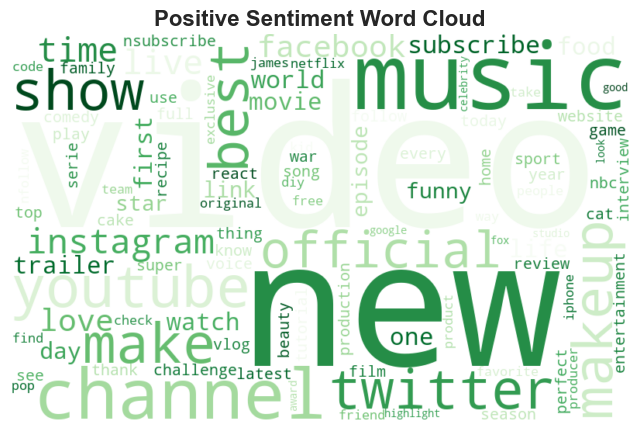

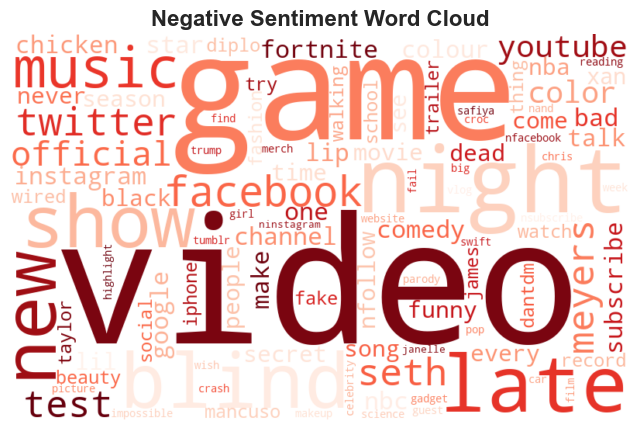

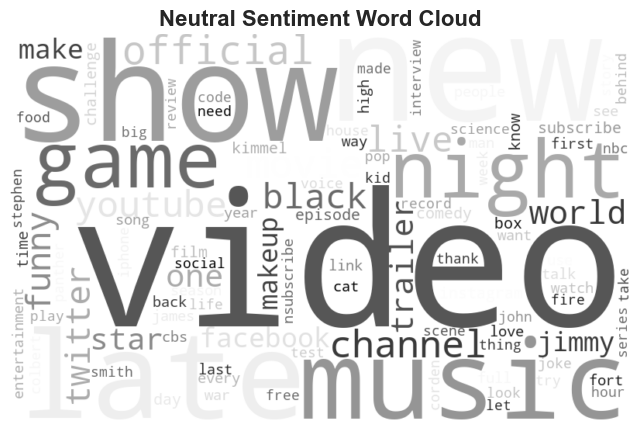

 Separate word clouds generated successfully!


In [14]:
print("Generating separate word clouds...")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare text for each sentiment
positive_text = ' '.join(df[df['sentiment_label'] == 'Positive']['text_no_stopwords'].dropna())
negative_text = ' '.join(df[df['sentiment_label'] == 'Negative']['text_no_stopwords'].dropna())
neutral_text  = ' '.join(df[df['sentiment_label'] == 'Neutral']['text_no_stopwords'].dropna())

# --- Positive Word Cloud ---
if positive_text.strip():
    wordcloud_pos = WordCloud(
        width=800, height=500,
        background_color='white',
        colormap='Greens',
        collocations=False,
        max_words=100
    ).generate(positive_text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Positive Sentiment Word Cloud', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
else:
    print(" No positive text data for word cloud.")

# --- Negative Word Cloud ---
if negative_text.strip():
    wordcloud_neg = WordCloud(
        width=800, height=500,
        background_color='white',
        colormap='Reds',
        collocations=False,
        max_words=100
    ).generate(negative_text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Negative Sentiment Word Cloud', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
else:
    print(" No negative text data for word cloud.")

# --- Neutral Word Cloud ---
if neutral_text.strip():
    wordcloud_neu = WordCloud(
        width=800, height=500,
        background_color='white',
        colormap='Greys',
        collocations=False,
        max_words=100
    ).generate(neutral_text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_neu, interpolation='bilinear')
    plt.title('Neutral Sentiment Word Cloud', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
else:
    print(" No neutral text data for word cloud.")

print(" Separate word clouds generated successfully!")


 Engagement Analysis 
                      views               likes          comment_count        
                       mean    median      mean   median          mean  median
sentiment_label                                                               
Negative         2660270.74  920944.0  84781.16  19274.5      12258.11  2717.5
Neutral          2651557.46  680369.5  79158.90  16749.0      10052.59  1796.5
Positive         2196456.49  667082.0  71044.72  18573.0       7359.17  1853.0


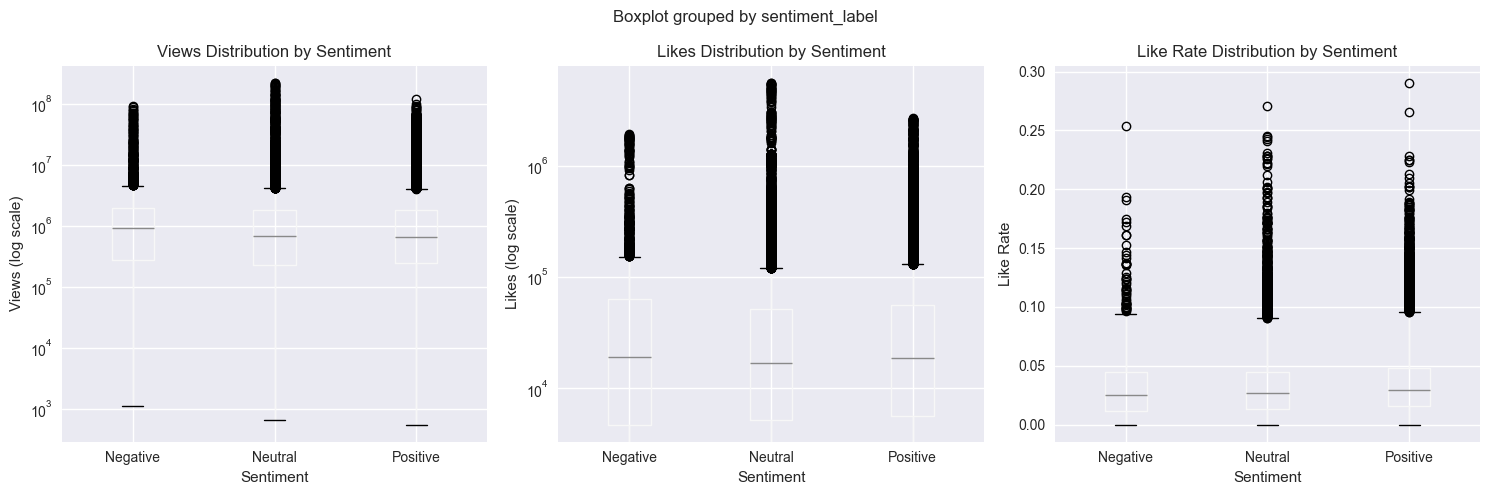

In [15]:
# Additional engagement analysis
if 'views' in df.columns and 'likes' in df.columns:
    print(" Engagement Analysis ")
    
    # Sentiment vs engagement metrics
    engagement_by_sentiment = df.groupby('sentiment_label').agg({
        'views': ['mean', 'median'],
        'likes': ['mean', 'median'],
        'comment_count': ['mean', 'median'] if 'comment_count' in df.columns else 'likes'
    }).round(2)
    
    print(engagement_by_sentiment)
    
    # Visualization of engagement by sentiment
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Views by sentiment
    df.boxplot(column='views', by='sentiment_label', ax=axes[0])
    axes[0].set_title('Views Distribution by Sentiment')
    axes[0].set_xlabel('Sentiment')
    axes[0].set_ylabel('Views (log scale)')
    axes[0].set_yscale('log')
    
    # Likes by sentiment
    df.boxplot(column='likes', by='sentiment_label', ax=axes[1])
    axes[1].set_title('Likes Distribution by Sentiment')
    axes[1].set_xlabel('Sentiment')
    axes[1].set_ylabel('Likes (log scale)')
    axes[1].set_yscale('log')
    
    # Like rate by sentiment
    if 'like_rate' in df.columns:
        df.boxplot(column='like_rate', by='sentiment_label', ax=axes[2])
        axes[2].set_title('Like Rate Distribution by Sentiment')
        axes[2].set_xlabel('Sentiment')
        axes[2].set_ylabel('Like Rate')
    
    plt.tight_layout()
    plt.show()

   YOUTUBE AUDIENCE REACTION ANALYSIS - FINAL INSIGHTS

 DATASET OVERVIEW:
   • Total Videos Analyzed: 40,949
   • Analysis Period: 17.01.12 to 18.31.05
   • Unique Categories: 15

 SENTIMENT DISTRIBUTION:
   • Positive: 26,205 (64.0%)
   • Negative: 2,188 (5.3%)
   • Neutral: 12,556 (30.7%)


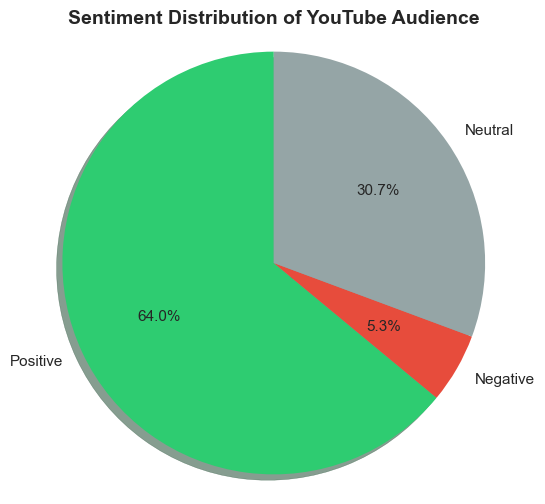


 OVERALL COMMUNITY MOOD: POSITIVE
   • Average Polarity Score: 0.159
   • Average Subjectivity: 0.477

 KEY FINDINGS:
    Positive sentiment dominates (64.0% vs 5.3% negative)
    Content tends to be factual/objective (avg: 0.48)

    Content Preference Patterns:
      • Audiences respond most positively to: Travel & Events (polarity: 0.267)
      • This suggests preference for: Lifestyle & personal content

 RECOMMENDATIONS:
   • Focus on Travel & Events category content
   • Monitor sentiment trends for early detection of audience mood shifts
   • Leverage positive keywords: video, new, music, videos, show
   • Optimize content strategy based on high-engagement sentiment patterns
Analysis completed successfully!


In [16]:
# --- Comprehensive analysis summary ---
print("   YOUTUBE AUDIENCE REACTION ANALYSIS - FINAL INSIGHTS")

# --- Calculations ---
total_videos = len(df)
pos_count = (df['sentiment_label'] == 'Positive').sum()
neg_count = (df['sentiment_label'] == 'Negative').sum()
neu_count = (df['sentiment_label'] == 'Neutral').sum()
avg_polarity = df['polarity'].mean()
avg_subjectivity = df['subjectivity'].mean()

# Determine overall mood
if avg_polarity > 0.05:
    mood = "POSITIVE"
elif avg_polarity < -0.05:
    mood = "NEGATIVE"
else:
    mood = "NEUTRAL"

# Perform category-specific sentiment analysis
cat_sentiment = pd.DataFrame()
if 'category_name' in df.columns:
    cat_sentiment = df.groupby('category_name')['polarity'].agg(['mean', 'count']).reset_index()
    cat_sentiment = cat_sentiment[cat_sentiment['count'] >= 10]
    cat_sentiment = cat_sentiment.sort_values('mean', ascending=False)

# --- Summary Printout ---

# 1. DATASET OVERVIEW
print(f"\n DATASET OVERVIEW:")
print(f"   • Total Videos Analyzed: {total_videos:,}")
print(f"   • Analysis Period: {df['trending_date'].min()} to {df['trending_date'].max()}")
print(f"   • Unique Categories: {df['category_name'].nunique() if 'category_name' in df.columns else 'N/A'}")

# 2. SENTIMENT DISTRIBUTION
print(f"\n SENTIMENT DISTRIBUTION:")
print(f"   • Positive: {pos_count:,} ({pos_count/total_videos*100:.1f}%)")
print(f"   • Negative: {neg_count:,} ({neg_count/total_videos*100:.1f}%)")
print(f"   • Neutral: {neu_count:,} ({neu_count/total_videos*100:.1f}%)")

# ... (Pie chart code remains the same) ...
plt.figure(figsize=(6, 6))
plt.pie(
    [pos_count, neg_count, neu_count],
    labels=['Positive', 'Negative', 'Neutral'],
    autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c', '#95a5a6'],
    shadow=True, textprops={'fontsize': 11}
)
plt.title('Sentiment Distribution of YouTube Audience', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# 3. OVERALL COMMUNITY MOOD
print(f"\n OVERALL COMMUNITY MOOD: {mood}")
print(f"   • Average Polarity Score: {avg_polarity:.3f}")
print(f"   • Average Subjectivity: {avg_subjectivity:.3f}")

# ... (Key Findings, Emotional Tone, and other sections remain the same until Content Preference) ...
print(f"\n KEY FINDINGS:")
if pos_count > neg_count:
    print(f"    Positive sentiment dominates ({pos_count/total_videos*100:.1f}% vs {neg_count/total_videos*100:.1f}% negative)")
else:
    print(f"    Negative sentiment is prominent.")
if avg_subjectivity <= 0.5:
    print(f"    Content tends to be factual/objective (avg: {avg_subjectivity:.2f})")
else:
    print(f"    Content tends to be subjective/opinion-based (avg: {avg_subjectivity:.2f})")


if not cat_sentiment.empty:
    print(f"\n    Content Preference Patterns:")
    top_positive_cat = cat_sentiment.iloc[0]['category_name']
    top_positive_score = cat_sentiment.iloc[0]['mean']
    
    print(f"      • Audiences respond most positively to: {top_positive_cat} (polarity: {top_positive_score:.3f})")
    print(f"      • This suggests preference for: {'Entertainment & leisure content' if 'Entertainment' in top_positive_cat or 'Music' in top_positive_cat or 'Comedy' in top_positive_cat else 'Educational & informative content' if 'Education' in top_positive_cat or 'How' in top_positive_cat else 'Lifestyle & personal content'}")


print(f"\n RECOMMENDATIONS:")
if not cat_sentiment.empty:
    print(f"   • Focus on {cat_sentiment.iloc[0]['category_name']} category content")
    print(f"   • Monitor sentiment trends for early detection of audience mood shifts")
if 'count_results' in locals() and not count_results.empty:
    print(f"   • Leverage positive keywords: {', '.join(count_results.head(5)['term'].tolist())}")
    print(f"   • Optimize content strategy based on high-engagement sentiment patterns")

print(f"Analysis completed successfully!")





In [17]:
# Category-specific insights
print(f"\n CATEGORY INSIGHTS:")

# Create cat_sentiment variable for use in later cells
cat_sentiment = pd.DataFrame()

if 'category_name' in df.columns:
    # Most positive categories
    cat_sentiment = df.groupby('category_name')['polarity'].agg(['mean', 'count']).reset_index()
    cat_sentiment = cat_sentiment[cat_sentiment['count'] >= 10]  # Categories with at least 10 videos
    cat_sentiment = cat_sentiment.sort_values('mean', ascending=False)
    
    # Use a check to make sure the dataframe is not empty before accessing iloc[0]
    if not cat_sentiment.empty:
        print(f"\n    Most Positive Categories:")
        for i, (idx, row) in enumerate(cat_sentiment.head(3).iterrows()):
            print(f"      {i+1}. {row['category_name']}: {row['mean']:.3f} polarity ({row['count']} videos)")
        
        print(f"\n    Most Negative Categories:")
        for i, (idx, row) in enumerate(cat_sentiment.tail(3).iterrows()):
            rank = len(cat_sentiment) - i
            print(f"      {rank}. {row['category_name']}: {row['mean']:.3f} polarity ({row['count']} videos)")
    else:
        print("   No categories found with sufficient data (minimum 10 videos)")
else:
    print("   No category information available in the dataset")

# Top keywords insights
# FIX: Changed 'tfidf_results' to the correct variable 'count_results'
if 'count_results' in locals() and not count_results.empty:
    print(f"\n TOP TRENDING KEYWORDS:")
    top_keywords = count_results.head(10)['term'].tolist()
    print(f"   • {', '.join(top_keywords)}")
else:
    print(f"\n TOP TRENDING KEYWORDS:")
    print("   • No keyword results available")


 CATEGORY INSIGHTS:

    Most Positive Categories:
      1. Travel & Events: 0.267 polarity (402 videos)
      2. Pets & Animals: 0.201 polarity (920 videos)
      3. Sports: 0.180 polarity (2174 videos)

    Most Negative Categories:
      15. News & Politics: 0.131 polarity (2487 videos)
      14. Education: 0.115 polarity (1656 videos)
      13. Other: 0.037 polarity (114 videos)

 TOP TRENDING KEYWORDS:
   • video, new, music, videos, show, 2018, news, youtube, channel, official


In [18]:
# Key findings and recommendations
print(f"\n KEY FINDINGS:")

if pos_count > neg_count:
    print(f"    Positive sentiment dominates ({pos_count/total_videos*100:.1f}% vs {neg_count/total_videos*100:.1f}% negative)")
    print(f"    US YouTube audience shows generally favorable reactions")
else:
    print(f"    Negative sentiment is prominent ({neg_count/total_videos*100:.1f}% vs {pos_count/total_videos*100:.1f}% positive)")
    print(f"    Content creators should focus on improving audience satisfaction")

if df['subjectivity'].mean() > 0.5:
    print(f"   Content tends to be subjective/opinion-based (avg: {df['subjectivity'].mean():.2f})")
else:
    print(f"    Content tends to be factual/objective (avg: {df['subjectivity'].mean():.2f})")

# === EMOTIONAL TONE ANALYSIS ===
print(f"\n EMOTIONAL TONE ANALYSIS:")

# Analyze emotional intensity
high_polarity_positive = (df['polarity'] > 0.3).sum()
mild_positive = ((df['polarity'] > 0.1) & (df['polarity'] <= 0.3)).sum()
high_polarity_negative = (df['polarity'] < -0.3).sum()
mild_negative = ((df['polarity'] < -0.1) & (df['polarity'] >= -0.3)).sum()

print(f"    Emotional Intensity Distribution:")
print(f"      • Highly Positive (>0.3): {high_polarity_positive:,} ({high_polarity_positive/total_videos*100:.1f}%)")
print(f"      • Mildly Positive (0.1-0.3): {mild_positive:,} ({mild_positive/total_videos*100:.1f}%)")
print(f"      • Mildly Negative (-0.3 to -0.1): {mild_negative:,} ({mild_negative/total_videos*100:.1f}%)")
print(f"      • Highly Negative (<-0.3): {high_polarity_negative:,} ({high_polarity_negative/total_videos*100:.1f}%)")

# Emotional tone interpretation
dominant_emotion = "enthusiasm" if high_polarity_positive > mild_positive else "satisfaction"
if neg_count > pos_count:
    dominant_emotion = "frustration" if high_polarity_negative > mild_negative else "disappointment"

print(f"\n    Dominant Emotional Tone: {dominant_emotion.upper()}")

if df['polarity'].mean() > 0.2:
    tone_description = "highly optimistic and enthusiastic"
elif df['polarity'].mean() > 0.1:
    tone_description = "generally positive and approving"
elif df['polarity'].mean() > -0.1:
    tone_description = "balanced and measured"
elif df['polarity'].mean() > -0.2:
    tone_description = "somewhat critical and reserved"
else:
    tone_description = "predominantly negative and disapproving"

print(f"    Overall Emotional Climate: The audience exhibits {tone_description} reactions")
print(f"    Engagement Style: {'Highly expressive and emotionally engaged' if df['subjectivity'].mean() > 0.6 else 'Moderately expressive with balanced perspectives' if df['subjectivity'].mean() > 0.4 else 'Reserved and fact-focused'}")

# === RESPONSE PATTERNS ANALYSIS ===
print(f"\n AUDIENCE RESPONSE PATTERNS:")

# Engagement correlation with sentiment
if 'views' in df.columns and 'likes' in df.columns:
    pos_avg_views = df[df['sentiment_label'] == 'Positive']['views'].mean()
    neg_avg_views = df[df['sentiment_label'] == 'Negative']['views'].mean()
    neu_avg_views = df[df['sentiment_label'] == 'Neutral']['views'].mean()
    
    pos_avg_likes = df[df['sentiment_label'] == 'Positive']['likes'].mean()
    neg_avg_likes = df[df['sentiment_label'] == 'Negative']['likes'].mean()
    
    print(f"    Viewing Behavior Patterns:")
    print(f"      • Positive content averages: {pos_avg_views:,.0f} views, {pos_avg_likes:,.0f} likes")
    print(f"      • Negative content averages: {neg_avg_views:,.0f} views, {neg_avg_likes:,.0f} likes")
    print(f"      • Neutral content averages: {neu_avg_views:,.0f} views")
    
    if pos_avg_views > neg_avg_views:
        print(f"    Pattern: Positive content drives {(pos_avg_views/neg_avg_views-1)*100:.1f}% more views than negative content")
    else:
        print(f"    Pattern: Negative content attracts {(neg_avg_views/pos_avg_views-1)*100:.1f}% more views (controversy effect)")

# Content preference patterns
if 'category_name' in df.columns and 'cat_sentiment' in locals():
    print(f"\n    Content Preference Patterns:")
    top_positive_cat = cat_sentiment.iloc[0]['category_name']
    top_positive_score = cat_sentiment.iloc[0]['mean']
    
    print(f"      • Audiences respond most positively to: {top_positive_cat} (polarity: {top_positive_score:.3f})")
    print(f"      • This suggests preference for: {'Entertainment & leisure content' if 'Entertainment' in top_positive_cat or 'Music' in top_positive_cat or 'Comedy' in top_positive_cat else 'Educational & informative content' if 'Education' in top_positive_cat or 'How' in top_positive_cat else 'Lifestyle & personal content'}")

# Emotional response timing (if trending_date available)
if 'trending_date' in df.columns:
    try:
        df['trending_date_parsed'] = pd.to_datetime(df['trending_date'])
        monthly_sentiment = df.groupby(df['trending_date_parsed'].dt.month)['polarity'].mean()
        best_month = monthly_sentiment.idxmax()
        worst_month = monthly_sentiment.idxmin()
        
        print(f"\n    Temporal Response Patterns:")
        print(f"      • Most positive month: {best_month} (polarity: {monthly_sentiment[best_month]:.3f})")
        print(f"      • Most negative month: {worst_month} (polarity: {monthly_sentiment[worst_month]:.3f})")
        print(f"      • Seasonal effect: {'Strong seasonal variation in emotional responses' if monthly_sentiment.std() > 0.05 else 'Consistent emotional patterns throughout the year'}")
    except:
        pass

# Content length impact on emotions
if 'title_length' in df.columns:
    short_titles_sentiment = df[df['title_length'] <= 50]['polarity'].mean()
    long_titles_sentiment = df[df['title_length'] > 50]['polarity'].mean()
    
    print(f"\n    Content Format Response Patterns:")
    print(f"      • Short titles (≤50 chars): {short_titles_sentiment:.3f} average polarity")
    print(f"      • Long titles (>50 chars): {long_titles_sentiment:.3f} average polarity")
    
    if abs(short_titles_sentiment - long_titles_sentiment) > 0.05:
        preferred_length = "shorter" if short_titles_sentiment > long_titles_sentiment else "longer"
        print(f"      • Pattern: Audiences respond more positively to {preferred_length} titles")

print(f"\n RECOMMENDATIONS:")
print(f"   • Focus on {cat_sentiment.iloc[0]['category_name'] if 'cat_sentiment' in locals() and len(cat_sentiment) > 0 else 'top-performing'} category content")
print(f"   • Monitor sentiment trends for early detection of audience mood shifts")
print(f"   • Leverage positive keywords: {', '.join(count_results.head(5)['term'].tolist()) if 'count_results' in locals() else 'trending terms'}")
print(f"   • Optimize content strategy based on high-engagement sentiment patterns")

# Additional strategic recommendations based on emotional patterns
if df['polarity'].mean() > 0.1:
    print(f"   • Capitalize on positive momentum with consistent, upbeat content")
    print(f"   • Maintain emotional authenticity to preserve audience trust")
else:
    print(f"   • Focus on addressing audience concerns and improving content quality")
    print(f"   • Implement feedback loops to understand negative sentiment drivers")

if df['subjectivity'].mean() > 0.5:
    print(f"   • Embrace personal storytelling and opinion-based content")
    print(f"   • Encourage community discussion and emotional engagement")
else:
    print(f"   • Maintain factual accuracy and objective presentation")
    print(f"   • Balance information density with emotional connection")


print(f" EMOTIONAL INSIGHTS SUMMARY:")
print(f"The YouTube audience demonstrates {tone_description} emotional patterns,")
print(f"with {dominant_emotion} as the primary emotional driver. Response patterns")
print(f"indicate {'high emotional engagement' if df['subjectivity'].mean() > 0.5 else 'measured, analytical engagement'} with content.")
print(f"Analysis completed successfully! ")



 KEY FINDINGS:
    Positive sentiment dominates (64.0% vs 5.3% negative)
    US YouTube audience shows generally favorable reactions
    Content tends to be factual/objective (avg: 0.48)

 EMOTIONAL TONE ANALYSIS:
    Emotional Intensity Distribution:
      • Highly Positive (>0.3): 7,525 (18.4%)
      • Mildly Positive (0.1-0.3): 18,680 (45.6%)
      • Mildly Negative (-0.3 to -0.1): 1,670 (4.1%)
      • Highly Negative (<-0.3): 518 (1.3%)

    Dominant Emotional Tone: SATISFACTION
    Overall Emotional Climate: The audience exhibits generally positive and approving reactions
    Engagement Style: Moderately expressive with balanced perspectives

 AUDIENCE RESPONSE PATTERNS:
    Viewing Behavior Patterns:
      • Positive content averages: 2,196,456 views, 71,045 likes
      • Negative content averages: 2,660,271 views, 84,781 likes
      • Neutral content averages: 2,651,557 views
    Pattern: Negative content attracts 21.1% more views (controversy effect)

    Content Preference Pa

In [19]:
# --- FINAL INSIGHTS AND RECOMMENDATIONS (CONSOLIDATED) ---

print("\n   YOUTUBE AUDIENCE REACTION ANALYSIS - FINAL INSIGHTS")

# --- Calculations ---
total_videos = len(df)
pos_count = (df['sentiment_label'] == 'Positive').sum()
neg_count = (df['sentiment_label'] == 'Negative').sum()
neu_count = (df['sentiment_label'] == 'Neutral').sum()
avg_polarity = df['polarity'].mean()
avg_subjectivity = df['subjectivity'].mean()

# Determine overall mood
if avg_polarity > 0.05:
    mood = "POSITIVE"
elif avg_polarity < -0.05:
    mood = "NEGATIVE"
else:
    mood = "NEUTRAL"

# Perform category-specific sentiment analysis
cat_sentiment = pd.DataFrame()
if 'category_name' in df.columns:
    cat_sentiment = df.groupby('category_name')['polarity'].agg(['mean', 'count']).reset_index()
    cat_sentiment = cat_sentiment[cat_sentiment['count'] >= 10]
    cat_sentiment = cat_sentiment.sort_values('mean', ascending=False)

# --- Summary Printout ---

# 1. DATASET OVERVIEW
print(f"\n DATASET OVERVIEW:")
print(f"   • Total Videos Analyzed: {total_videos:,}")
print(f"   • Analysis Period: {df['trending_date'].min()} to {df['trending_date'].max()}")
print(f"   • Unique Categories: {df['category_name'].nunique() if 'category_name' in df.columns else 'N/A'}")

# 2. SENTIMENT DISTRIBUTION
print(f"\n SENTIMENT DISTRIBUTION:")
print(f"   • Positive: {pos_count:,} ({pos_count/total_videos*100:.1f}%)")
print(f"   • Negative: {neg_count:,} ({neg_count/total_videos*100:.1f}%)")
print(f"   • Neutral: {neu_count:,} ({neu_count/total_videos*100:.1f}%)")

# 3. OVERALL COMMUNITY MOOD
print(f"\n OVERALL COMMUNITY MOOD: {mood}")
print(f"   • Average Polarity Score: {avg_polarity:.3f}")
print(f"   • Average Subjectivity: {avg_subjectivity:.3f}")

# 4. AUDIENCE RESPONSE PATTERNS
print(f"\n AUDIENCE RESPONSE PATTERNS:")
if 'views' in df.columns:
    pos_avg_views = df[df['sentiment_label'] == 'Positive']['views'].mean()
    neg_avg_views = df[df['sentiment_label'] == 'Negative']['views'].mean()
    print(f"    • Positive content averages: {pos_avg_views:,.0f} views")
    print(f"    • Negative content averages: {neg_avg_views:,.0f} views")
    if neg_avg_views > pos_avg_views:
        print(f"    • Pattern: Negative content attracts {(neg_avg_views/pos_avg_views-1)*100:.1f}% more views (controversy effect)")

# 5. CONTENT PREFERENCE
if not cat_sentiment.empty:
    top_positive_cat = cat_sentiment.iloc[0]['category_name']
    top_positive_score = cat_sentiment.iloc[0]['mean']
    print(f"\n    Content Preference Patterns:")
    print(f"      • Audiences respond most positively to: {top_positive_cat} (polarity: {top_positive_score:.3f})")

# 6. RECOMMENDATIONS
print(f"\n RECOMMENDATIONS:")
if not cat_sentiment.empty:
    print(f"   • Focus on {cat_sentiment.iloc[0]['category_name']} category content.")
if 'count_results' in locals():
    print(f"   • Leverage positive keywords like: {', '.join(count_results.head(5)['term'].tolist())}")
print(f"   • Monitor sentiment to detect audience mood shifts early.")




   YOUTUBE AUDIENCE REACTION ANALYSIS - FINAL INSIGHTS



 DATASET OVERVIEW:
   • Total Videos Analyzed: 40,949
   • Analysis Period: 17.01.12 to 18.31.05
   • Unique Categories: 15

 SENTIMENT DISTRIBUTION:
   • Positive: 26,205 (64.0%)
   • Negative: 2,188 (5.3%)
   • Neutral: 12,556 (30.7%)

 OVERALL COMMUNITY MOOD: POSITIVE
   • Average Polarity Score: 0.159
   • Average Subjectivity: 0.477

 AUDIENCE RESPONSE PATTERNS:
    • Positive content averages: 2,196,456 views
    • Negative content averages: 2,660,271 views
    • Pattern: Negative content attracts 21.1% more views (controversy effect)

    Content Preference Patterns:
      • Audiences respond most positively to: Travel & Events (polarity: 0.267)

 RECOMMENDATIONS:
   • Focus on Travel & Events category content.
   • Leverage positive keywords like: video, new, music, videos, show
   • Monitor sentiment to detect audience mood shifts early.
